# Exploring Weather Trends

## Outline

### Step 1: 
The data was extracted from the database using SQL Commands. 


``` mysql
SELECT *
FROM city_list
WHERE country = 'United States';

ALTER TABLE city_data RENAME COLUMN avg_temp TO local_avg_temp;
ALTER TABLE global_data RENAME COLUMN avg_temp TO global_avg_temp;

SELECT city_data.year, city_data.local_avg_temp, global_data.global_avg_temp
FROM global_data JOIN city_data
ON global_data.year = city_data.year
WHERE city = 'San Francisco';
``` 

### Step 2:
Moving averages of the local and global temperatures were calculated and plotted using pandas and matplotlib.pyplot.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
weather_data = pd.read_csv("udacity_project1.csv")
weather_data['local_MA_temp'] = weather_data.rolling(window=7)['local_avg_temp'].mean()
weather_data['global_MA_temp'] = weather_data.rolling(window=7)['global_avg_temp'].mean()
weather_data.head(10)

,year,local_avg_temp,global_avg_temp,local_MA_temp,global_MA_temp
0,1849,14.12,7.98,NaN,NaN
1,1850,13.80,7.90,NaN,NaN
2,1851,14.39,8.18,NaN,NaN
3,1852,13.81,8.10,NaN,NaN
4,1853,14.40,8.04,NaN,NaN
5,1854,13.98,8.21,NaN,NaN
6,1855,14.20,8.11,14.100000,8.074286
7,1856,14.10,8.00,14.097143,8.077143
8,1857,14.78,7.76,14.237143,8.057143
9,1858,14.19,8.10,14.208571,8.045714


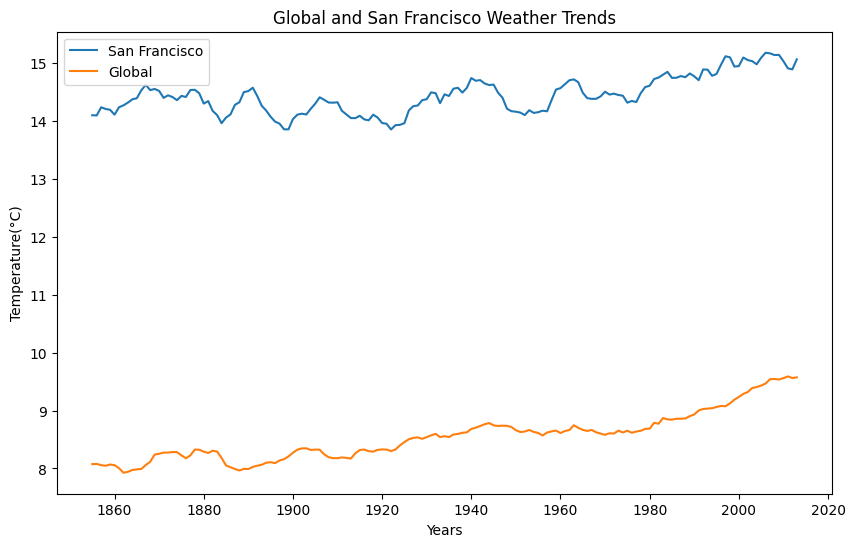

In [7]:
plt.figure(figsize=(10,6)) 
plt.plot(weather_data['year'], weather_data['local_MA_temp'], label='San Francisco')
plt.plot(weather_data['year'],weather_data['global_MA_temp'],label='Global')
plt.legend()
plt.xlabel("Years")
plt.ylabel("Temperature(°C)")
plt.title("Global and San Francisco Weather Trends")
plt.show()


### Results/ Observations

1. San Francisco average local temperature has increased around 1°C from 1849.
2. Global average temperature has increased around 1.5°C from 1849.
3. Both San Francisco local temperature and global temperature shows an overall increasing trend. 
4. San Francisco local temperature is higher (≈6°C) than the global average temperature.
5. San Francisco average local temperature fluctuates more than the global average temperature.

### References
https://www.1keydata.com/sql/alter-table-rename-column.html
https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/